# Optimal velocity model with  a possible extension to a Multiple car-following model
This program simulates traffic flow using the optimal velocity  model (OVM) proposed by [Bando et al. (1995)](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.51.1035). Furthermore, it offers the possibility to extend the driving behaviour to a multiple car-following (MCF) model with a exponential weighting function based on the model of [Peng and Sun, 2010](https://www.sciencedirect.com/science/article/pii/S0375960110001805). The code offers the possibility to run parts of the simulation using a fortran module. This decreases substantially the integration time.

### Compile Fortran module
The computational expensive calculations can be done using the fortran module when the optimal velocity function (OVF) is set to `tanh`. The following cell compiles the fortran code in the file `f90_subroutines.f90` and builds the extension module ` f90_subroutines`.

In [4]:
import os
os.system("f2py -c  f90_subroutines.f90 -m f90_subroutines")

0

### Import necessary python modules
The following cell imports necessary modules. The module `functions` contains all functions and routines for the integration of the model. In the module `plot` some pre-designed plots are defined. 

In [5]:
# import own pyhton modules 
import functions as fc
import plot as plot

# import other modules
import numpy as np
import matplotlib.pyplot as plt

import time
import gc

### Set parameters for the model

Before the model can be run, some parameters have to be set. These parameters determine for instance the chosen model that can be the OVM or the MCF model. [Bando et al. (1995)](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.51.1035) defined the optimal velocity function (OVF) as:

$V(\Delta x) = v_\mathrm{0}(\tanh(\Delta x - h) + \tanh h)$


This function is the `tanh`-function. Besides the `tanh`-function, one can chose a Heaviside function  (key: `hs`) as in [Sugiyama and Yamada (1997)](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.55.7749) or an algebraic function (key: `alg`) as in [Orosz et al. (2005)](https://www.sciencedirect.com/science/article/pii/S0167278905003775) for the OVF function. All parameters are summerized in the table below:



parameter | type      | value       | description
----------|-----------|-------------|--------------
model     | `str`     | OVM, MCF    | chosen model
N         | `int`     | e.g. 100    | number of cars
L         | `float`   | e.g. 200.0   | circuit length
a         | `float`   | e.g. 1.0     | sensitivity
ovf       | `str`     | tanh, hs, alg | optimal velocity function (OVF)
h         | `float`   | e.g. 2.0     | parameter in the tanh-OVF (inflection point)
v0        | `float`   | e.g. 1.0     | velocity scale
box       |`str`      | front, middle, back| platoon of cars that is considered
m         | `int`     | 5           | number of cars in the platoon
weight_function | `str` | exp, lin | weight function
weight_parameter| `float` | e.g 0.5 | exponent for exponential or coefficent for linear weigthing
lambda      | `float`     | e.g. 0.1 | relaxation strength
tmax        | `float`     | e.g. 1000.0| integration time
dt          | `float`     | e.g. 0.1   | time step
xpert       | `float`     | ndarray of size N| perturbation to the inital position of a car  

In [6]:
parameters = {
        "model":"MCF",
        "N":100,
        "L":200,
        "a":1.,
        "h":2.,
        "v0":1.,
        "ovf":"tanh",
        "m": 1,
        "box":"front",
        "weight_function":"exp",
        "weight_parameter":0.5,
        "lambda": 0.0,
        "tmax":1000, 
        "dt" : 0.1
        }

parameters["xpert"] = np.zeros(parameters["N"])
parameters["xpert"][0] = 0.1

### Model simulation

In the following cell the actual integration takes place. A model instance is generate based on the chosen parameter setting. Then, the cars are initialized around the steady state free flow with the a perturbation defined by the array `xpert` in the parameter settings:

$\Delta x_i = \frac{L}{N} + x_{pert,i} \text{ for all } i \in \{1,...,N\}$

$\dot{x}_i = V(\Delta x_i)$

After this the model is integrated using either a `python` or a `fortran` routine (defined through the option `kernel`).

In [7]:
#starting time
t_start = time.time() 

# generate a model instance from the chosen parameter setting
ovm = fc.ovm(parameters)

# initialize the cars in the model with a perturbation to the steady free flow
ovm.initCars()

# integrate the model using python or fortran (note that if kernel is fortran model automatically is a MCF-model)
ovm.integrate(kernel="python") 

#ending  time
t_end = time.time()

print "Integration time:" + str(t_end-t_start)

Integration time:2.00589489937


## Plot results

Plot the results in a panal plot. The function `ovm_small_panal` plots a 2x3 panal with various variables and the function `ovm_panal` a 3x4 panal. The plots are defined in the file `plot.py`.

365

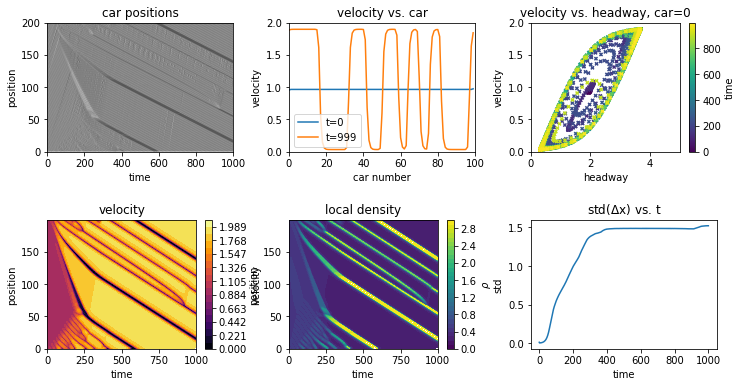

In [8]:
plt.close("all")

# generate a panal plot
plot.ovm_small_panal(ovm)

# release unreferenced memory 
gc.collect()